In [2]:
pip install -U jieba

     |████████████████████████████████| 19.2 MB 3.3 MB/s eta 0:00:01
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314478 sha256=c8a0c8a9ee8948665760b0dec173cab64124d5828a0115695e0fe733fba361d1
  Stored in directory: /home/jl8394/.cache/pip/wheels/17/a7/8b/a7e03881534e78558920ac68aaeca05180c0e2c3d11c4fce3b
Successfully built jieba
Note: you may need to restart the kernel to use updated packages.


In [1]:
import collections
import nltk
from nltk import agreement
import os
import pandas as pd
import numpy as np
import scipy.sparse as sparse
import jieba
import csv
import pickle
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

## Importing wordlist

In [2]:
porn = open("porn.txt","r").read().split("\n")
profanity = open("profanity.txt","r").read().split("\n")
pronoun = open("pronoun.txt","r").read().split("\n")
positive_words = open("positive_words.txt","r").read().split("\n")
negative_words = open("negative_words.txt","r").read().split("\n")

In [3]:
df= pd.read_excel("Anno-500.xlsx")
ocr=df.iloc[:,2]

In [4]:
s_ocr=[] #建立存储分词的列表
for i in range(len(ocr)):
    result=[]
    seg_list = jieba.cut(ocr[i])
    for w in seg_list :#读取每一行分词
        result.append(w)
    s_ocr.append(result)#将该行分词写入列表形式的总分词列表

Building prefix dict from /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/jieba/dict.txt ...
Dumping model to file cache /var/folders/s3/x6bgjnss22ggm9fct3z9mgz00000gn/T/jieba.cache
Loading model cost 1.90254807472229 seconds.
Prefix dict has been built succesfully.


In [5]:
df['cln_content'] = s_ocr
#df= pd.DataFrame(df['cln_content'])

## OCR, TM, P2V embedding

In [6]:
ocr_500=np.load('ocr_500.npy')
#ocr_merged=np.load('ocr_merged.npy')
#tm_merged=np.load('tm_merged.npy')
tm_500=np.load('tm_500.npy')
p2v_500=np.load('p2v_500.npy')
#p2v_merged=np.load('p2v_merged.npy')
p2v2_500=np.load('p2v2_500.npy')
p2v3_500=np.load('p2v3_500.npy')
ocr_tm_500=np.load('ocr_tm_500.npy')
#ocr_tm_merged=np.load('ocr_tm_merged.npy')
ocr_p2v_500=np.load('ocr_p2v_500.npy')
ocr_p2v2_500=np.load('ocr_p2v2_500.npy')
ocr_p2v3_500=np.load('ocr_p2v3_500.npy')
tm_p2v_500=np.load('tm_p2v_500.npy')
tm_p2v2_500=np.load('tm_p2v2_500.npy')
tm_p2v3_500=np.load('tm_p2v3_500.npy')
ocr_tm_p2v_500=np.load('ocr_tm_p2v_500.npy')
#ocr_tm_p2v_merged=np.load('ocr_tm_p2v_merged.npy')
ocr_tm_p2v2_500=np.load('ocr_tm_p2v2_500.npy')
ocr_tm_p2v3_500=np.load('ocr_tm_p2v3_500.npy')

### list()的話每一個都是np.array, 進去之後每個數字都是numpy.float32
### arr.toarray().tolist()的話每一個都是list, 進去之後每個數字都是float

In [7]:
df['ocr_emb']=list(ocr_500)
df['tm_emb']=list(tm_500)
df['p2v2_emb']=list(p2v2_500)
df['ocr_tm_p2v2_500_emb']=list(ocr_tm_p2v2_500)
#arr1 = sparse.coo_matrix(ocr_500)
#df['ocr_emb'] = arr1.toarray().tolist()
#arr2 = sparse.coo_matrix(tm_500)
#df['tm_emb'] = arr2.toarray().tolist()
#arr3 = sparse.coo_matrix(p2v2_500)
#df['p2v2_emb'] = arr3.toarray().tolist()
#arr4 = sparse.coo_matrix(ocr_tm_p2v2_500)
#df['ocr_tm_p2v2_500'] = arr4.toarray().tolist()

In [139]:
#df['ocr_emb'][0]

array([-3.44803161e-03, -1.40647916e-03, -2.00861637e-02, -1.23386160e-02,
       -3.03926934e-02, -3.30204256e-02,  6.79715276e-02, -3.71600199e-03,
       -3.78896855e-02, -5.13198599e-02, -2.99346242e-02, -2.46653054e-02,
       -4.65489216e-02,  6.75989548e-03,  5.51648512e-02,  6.09474853e-02,
        4.21853438e-02,  1.05038537e-02,  1.05466484e-03, -2.53310725e-02,
       -4.18840954e-03, -1.12355063e-02,  2.66580526e-02,  3.69208008e-02,
       -4.77307895e-03,  2.08921842e-02,  5.02035674e-03,  3.77529711e-02,
        6.11803792e-02,  3.39643913e-03,  3.11041884e-02,  4.95350175e-02,
       -3.14637534e-02, -1.09699639e-02, -5.29429875e-02,  3.20458114e-02,
       -4.39662039e-02,  1.86270457e-02,  7.66024515e-02,  4.31374013e-02,
        3.74725508e-03, -6.45035133e-02,  1.58310384e-02, -6.26251325e-02,
        6.13400945e-03,  9.77849122e-03,  3.64091508e-02, -4.19191346e-02,
        1.98597424e-02,  9.02523100e-03,  8.18930641e-02,  7.04200640e-02,
        3.07635441e-02, -

In [8]:
df.head(5)

,ID,Images,OCR,Template_Name,dh_1,dh_2,dh_3,cln_content,ocr_emb,tm_emb,p2v2_emb,ocr_tm_p2v2_500_emb
0,1,NaN,當我再差幾秒就遲到時，卻在這幾秒內衝到學校。我。學校。,自信的善逸,0,0,0,"[當我, 再, 差, 幾秒, 就, 遲到, 時, ，, 卻, 在, 這幾秒, 內, 衝到, ...","[-0.0034480316, -0.0014064792, -0.020086164, -...","[-0.051428244, -0.006179096, 0.012731423, -0.0...","[-0.5377346, 0.8174292, 0.43731427, -0.4928556...","[-0.0034480316, -0.0014064792, -0.020086164, -..."
1,2,NaN,當你以為他們要幫你拿倉鼠飼料來餵你吃，但手上卻是拿著兩條蟒蛇加上一個攝影機。,怕爆倉鼠,0,2,0,"[當你以, 為, 他們, 要, 幫, 你, 拿, 倉鼠, 飼料, 來, 餵, 你, 吃, ，...","[0.013175973, -0.0027130025, 0.030018723, 0.02...","[-0.005815765, 0.007365296, 0.0742434, 0.01984...","[-0.35660374, 0.6002908, 0.49771008, -0.273855...","[0.013175973, -0.0027130025, 0.030018723, 0.02..."
2,3,NaN,紅燈了行人大搖大擺的過馬路。行人。台灣的計程車司機\n,小丑被車撞,0,1,0,"[紅燈, 了, 行, 人大, 搖大, 擺, 的, 過馬路, 。, 行人, 。, 台灣, 的,...","[-0.035057098, -0.073808864, -0.018074743, 0.0...","[-0.028380213, -0.022930214, -0.0462088, 0.035...","[-0.20228152, 0.4813008, 0.08527977, -0.103984...","[-0.035057098, -0.073808864, -0.018074743, 0.0..."
3,4,NaN,辛普森家庭從來不會讓我失望。AREA 51 WARNING:DO NOT ENTER!\n\n,51禁區辛普森家族早就知道了,0,0,0,"[辛普森, 家庭, 從來, 不會, 讓, 我, 失望, 。, AREA, , 51, ,...","[0.014597042, -0.008372392, 0.042043738, 0.007...","[0.03861497, -0.026871063, 0.057037357, 0.0161...","[0.18491076, 0.5516072, 0.264255, 0.2202262, -...","[0.014597042, -0.008372392, 0.042043738, 0.007..."
4,5,NaN,武漢肺炎疫情日漸嚴重。習近平:,小熊維尼笑,0,1,2,"[武漢, 肺炎, 疫情, 日漸, 嚴重, 。, 習近, 平, :]","[0.0012484181, -0.026934076, 0.0077450513, 0.0...","[-0.017085267, -0.011113647, 0.05663415, 0.012...","[-0.13843994, 0.43964586, 0.3693608, -0.027635...","[0.0012484181, -0.026934076, 0.0077450513, 0.0..."


## Porn Score

In [150]:
porn_score = []
for text in list(df.cln_content):
    result=0
    for words in porn:
         if words in text:
                 result += 1 
    porn_score.append(result)
    porn_score

In [114]:
df['porn_score']=porn_score

In [153]:
porn_score = np.array(porn_score)
np.save('porn_score', porn_score)

## Profanity Score

In [154]:
profanity_score = []
for text in list(df.cln_content):
    result=0
    for words in profanity:
         if words in text:
                 result += 1 
    profanity_score.append(result)
    profanity_score

In [116]:
df['profanity_score']=profanity_score

In [155]:
profanity_score = np.array(profanity_score)
np.save('profanity_score', profanity_score)

## Pronoun Count

In [156]:
pronoun_count = []
for text in list(df.cln_content):
    result=0
    for words in pronoun:
         if words in text:
                 result += 1 
    pronoun_count.append(result)
    pronoun_count

In [118]:
df['pronoun_count']=pronoun_count

In [157]:
pronoun_count = np.array(pronoun_count)
np.save('pronoun_count', pronoun_count)

## Sentiment Score

In [158]:
positive_score = []
for text in list(df.cln_content):
    result = 0
    for words in positive_words:
        if words in text:
            result += 1
    positive_score.append(result)
# positive_score

In [159]:
negative_score = []
for text in list(df.cln_content):
    result = 0
    for words in negative_words:
        if words in text:
            result -= 1
    negative_score.append(result)
# negative_score

In [160]:
df['polarity_score'] = [positive_score[i] + negative_score[i] for i in range(len(positive_score))]

In [161]:
df.loc[df.polarity_score > 0, 'sentiment'] = '1' 
df.loc[df.polarity_score < 0, 'sentiment'] = '-1' 
df.loc[df.polarity_score == 0, 'sentiment'] = '0'


In [164]:
sentiment=df['sentiment']
sentiment = np.array(sentiment)
np.save('sentiment', sentiment)

In [174]:
def concats(vec1, vec2,vec3,vec4):
    return np.concatenate((vec1, vec2,vec3,vec4))

In [176]:
annox=[]
for emb1, emb2,emb3,emb4 in zip(porn_score,profanity_score,pronoun_count,sentiment):
    res=concats(emb1,emb2,emb3,emb4)
    annox.append(res)
    
len(annox)

ValueError: zero-dimensional arrays cannot be concatenated

## Fleiss' Kappa

In [6]:
#using NLTK
rater1 = df['dh_1']
rater2 = df['dh_2']
rater3 = df['dh_3']

taskdata=[[0,str(i),str(rater1[i])] for i in range(0,len(rater1))]+[[1,str(i),str(rater2[i])] for i in range(0,len(rater2))]+[[2,str(i),str(rater3[i])] for i in range(0,len(rater3))]
ratingtask = agreement.AnnotationTask(data=taskdata)
print("kappa " +str(ratingtask.kappa()))
print("fleiss " + str(ratingtask.multi_kappa()))
print("alpha " +str(ratingtask.alpha()))
print("scotts " + str(ratingtask.pi()))

kappa 0.35171479887686874
fleiss 0.3500214977361773
alpha 0.33968551893206667
scotts 0.33924501560913944


In [123]:
#a ratio relating the level of agreement observed vs what would be expected by chance
def fleiss_kappa(lists, classes):
    n = len(lists)
    N = len(lists[0])
    k = len(classes)
    
    nij = []
    for i in range(N):
        nij.append([0]*k)
        
    
    for i in range(len(lists)):
        for j in range(len(lists[i])):
            nij[j][classes.index(lists[i][j])] += 1 
    
    P = []
    for i in nij:
        P.append(1/(n*(n-1))*(sum([j*j for j in i])-n))
    return (((sum(P)/N)-(sum([y*y for y in [x/(N*n) for x in[sum(i) for i in zip(*nij)]]])))/(1-sum([y*y for y in [x/(N*n) for x in[sum(i) for i in zip(*nij)]]]))+1)/2

In [124]:
classes = [0, 1, 2, 3] 

rater1 = df['dh_1']
rater2 = df['dh_2']
rater3 = df['dh_3']

ratings = [rater1, rater2, rater3]

print(fleiss_kappa(ratings, classes))

0.6696225078045701


## Integer encoding + Min-Max Scaling

scale these numerical descriptive features before fitting any models

Each descriptive feature is scaled to be between 0 and 1. Min-max scaling for a numerical feature is done as follows:

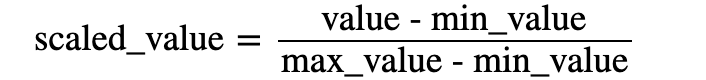

In [125]:
r_df=pd.DataFrame({'rater1':rater1,'rater2':rater2,'rater3':rater3}, columns=['rater1','rater2','rater3'])
df['rating_avg']=r_df.mean(axis=1)

In [126]:
x=df['rating_avg'].values

In [127]:
#其實已經做了Integer encoding, 可當成是numerical
x=x.reshape((-1,1))
min_max= preprocessing.MinMaxScaler().fit_transform(x).ravel()

In [128]:
df['min_max']=min_max

##  Integer encoding + Standard Scaling

Each descriptive feature has a 0 mean and 1 standard deviation. 

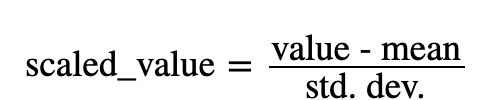

In [65]:
x=df['rating_avg'].values
x=x.reshape((-1,1))
standard = preprocessing.StandardScaler().fit_transform(x).ravel()

In [66]:
df['standard']=standard

In [71]:
#labelencoder = LabelEncoder()
#df['dh_1_label_enc'] = labelencoder.fit_transform(df['dh_1'])
#df['dh_1_label_enc']

## Anno-500 標記統計

In [12]:
import matplotlib.pyplot as plt

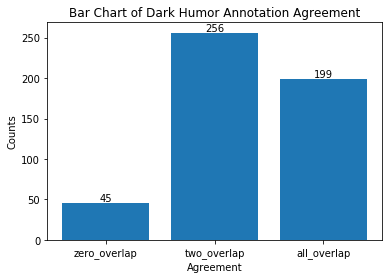

In [87]:
x = ["zero_overlap","two_overlap", "all_overlap"]
y = [45, 256,199]
bar=plt.bar(x, y)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
plt.xlabel("Agreement")
plt.ylabel("Counts")
plt.title("Bar Chart of Dark Humor Annotation Agreement")
plt.show()

In [11]:
df.head(10)

,ID,Images,OCR,Template_Name,dh_1,dh_2,dh_3,cln_content,ocr_emb,tm_emb,p2v2_emb,ocr_tm_p2v2_500_emb,porn_score,profanity_score,pronoun_count,polarity_score,sentiment,rating_avg,min_max
0,1,NaN,當我再差幾秒就遲到時，卻在這幾秒內衝到學校。我。學校。,自信的善逸,0,0,0,"[當我, 再, 差, 幾秒, 就, 遲到, 時, ，, 卻, 在, 這幾秒, 內, 衝到, ...","[-0.0034480316, -0.0014064792, -0.020086164, -...","[-0.051428244, -0.006179096, 0.012731423, -0.0...","[-0.5377346, 0.8174292, 0.43731427, -0.4928556...","[-0.0034480316, -0.0014064792, -0.020086164, -...",0,0,1,0,0,0.000000,0.000000
1,2,NaN,當你以為他們要幫你拿倉鼠飼料來餵你吃，但手上卻是拿著兩條蟒蛇加上一個攝影機。,怕爆倉鼠,0,2,0,"[當你以, 為, 他們, 要, 幫, 你, 拿, 倉鼠, 飼料, 來, 餵, 你, 吃, ，...","[0.013175973, -0.0027130025, 0.030018723, 0.02...","[-0.005815765, 0.007365296, 0.0742434, 0.01984...","[-0.35660374, 0.6002908, 0.49771008, -0.273855...","[0.013175973, -0.0027130025, 0.030018723, 0.02...",0,0,1,0,0,0.666667,0.222222
2,3,NaN,紅燈了行人大搖大擺的過馬路。行人。台灣的計程車司機\n,小丑被車撞,0,1,0,"[紅燈, 了, 行, 人大, 搖大, 擺, 的, 過馬路, 。, 行人, 。, 台灣, 的,...","[-0.035057098, -0.073808864, -0.018074743, 0.0...","[-0.028380213, -0.022930214, -0.0462088, 0.035...","[-0.20228152, 0.4813008, 0.08527977, -0.103984...","[-0.035057098, -0.073808864, -0.018074743, 0.0...",0,0,0,0,0,0.333333,0.111111
3,4,NaN,辛普森家庭從來不會讓我失望。AREA 51 WARNING:DO NOT ENTER!\n\n,51禁區辛普森家族早就知道了,0,0,0,"[辛普森, 家庭, 從來, 不會, 讓, 我, 失望, 。, AREA, , 51, ,...","[0.014597042, -0.008372392, 0.042043738, 0.007...","[0.03861497, -0.026871063, 0.057037357, 0.0161...","[0.18491076, 0.5516072, 0.264255, 0.2202262, -...","[0.014597042, -0.008372392, 0.042043738, 0.007...",0,0,1,-3,-1,0.000000,0.000000
4,5,NaN,武漢肺炎疫情日漸嚴重。習近平:,小熊維尼笑,0,1,2,"[武漢, 肺炎, 疫情, 日漸, 嚴重, 。, 習近, 平, :]","[0.0012484181, -0.026934076, 0.0077450513, 0.0...","[-0.017085267, -0.011113647, 0.05663415, 0.012...","[-0.13843994, 0.43964586, 0.3693608, -0.027635...","[0.0012484181, -0.026934076, 0.0077450513, 0.0...",0,0,0,-2,-1,1.000000,0.333333
5,6,NaN,"女人:我的傷勢如何?護理人員:還不錯,只有腿部擦傷而已。女人:我能看看嗎?護理人員:不太方便...",女人躺在救護車上,2,2,2,"[女人, :, 我, 的, 傷勢, 如何, ?, 護理, 人員, :, 還不錯, ,, 只有...","[0.051407035, 0.015403028, 0.06547234, 0.00215...","[0.018699622, -0.018211206, -0.0697222, 0.0294...","[-0.6882256, 0.49104884, 0.3950626, -0.0669471...","[0.051407035, 0.015403028, 0.06547234, 0.00215...",0,0,1,-2,-1,2.000000,0.666667
6,7,NaN,"醫生:史蒂芬妮,你快死了。病人:什麼!?醫生:愚人節快樂!病人:哈哈哈,可是今天不是四月一號...",醫生看著苦惱的病人,2,2,2,"[醫生, :, 史蒂芬, 妮, ,, 你, 快死了, 。, 病人, :, 什麼, !, ?,...","[0.006917947, -0.040207602, 0.0038061142, -0.0...","[0.019617623, -0.023825625, -0.020928422, 0.01...","[-0.52309585, 0.67755055, 0.43121225, -0.56486...","[0.006917947, -0.040207602, 0.0038061142, -0.0...",0,0,2,-4,-1,2.000000,0.666667
7,8,NaN,皮卡:我不是腦麻兒。皮卡。\n,低能兒,2,3,2,"[皮卡, :, 我, 不是, 腦麻兒, 。, 皮卡, 。, \n]","[0.06848506, -0.05862978, -0.0019475162, -0.03...","[0.013279542, -0.06721787, -0.024495786, -0.05...","[-0.45322442, 0.9036457, 0.34255874, -0.193167...","[0.06848506, -0.05862978, -0.0019475162, -0.03...",0,0,1,-1,-1,2.333333,0.777778
8,9,NaN,給三歲半的小妹妹買的芭比娃娃，但她的玩法好像和其他孩子有點不同..\n,芭比娃娃欺負別人,1,1,0,"[給三歲, 半, 的, 小妹妹, 買, 的, 芭比娃娃, ，, 但, 她, 的, 玩法, 好...","[0.032532975, 0.00016502145, 0.017045466, 0.01...","[-0.03801355, -0.023124255, 0.053622477, 0.006...","[-0.3106686, 0.575411, 0.7006884, -0.48054448,...","[0.032532975, 0.00016502145, 0.017045466, 0.01...",0,0,0,1,1,0.666667,0.222222
9,10,NaN,"中國人:「相信党,相信政府!」口罩都不用戴了?不戴!相信政府!",大媽開心、停屍間,2,2,2,"[中國人, :, 「, 相信, 党, ,, 相信, 政府, !, 」, 口罩, 都, 不用,...","[0.01874962, 0.055081934, 0.02705088, -0.02416...","[-0.006264757, -0.04730464, -0.008424059, -0.0...","[0.38690665, 0.57285905, 0.6802858, 0.15483646...","[0.01874962, 0.055081934, 0.02705088, -0.02416...",0,0,0,-1,-1,2.000000,0.666667


In [48]:
print(df['rating_avg'].describe())

count    500.000000
mean       0.860000
std        0.846200
min        0.000000
25%        0.000000
50%        0.666667
75%        1.666667
max        3.000000
Name: rating_avg, dtype: float64


In [60]:
Anno_1=df['dh_1'].value_counts()
Anno_2=df['dh_2'].value_counts()
Anno_3=df['dh_3'].value_counts()
Anno_1


0    266
2    146
1     73
3     15
Name: dh_1, dtype: int64

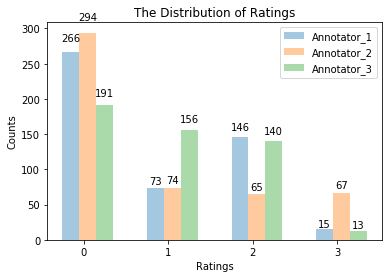

<Figure size 432x288 with 0 Axes>

In [62]:
labels = ['0', '1', '2', '3']
#x = np.arange(len(labels))  # the label locations
#width = 0.35  # the width of the bars
col_count = 4
bar_width = 0.2
index = np.arange(col_count)
A1_counts = [266, 73, 146, 15]
A2_counts = [294, 74, 65, 67]
A3_counts = [191, 156, 140, 13]
#pdf = pd.DataFrame([['Annotator_1','0',266],['Annotator_1','1',73],['Annotator_1','2',146],['Annotator_1','3',15],
                   #['Annotator_2','0',294],['Annotator_2','1',74], ['Annotator_2','2',65], ['Annotator_2','3',67], ['Annotator_3','0',191],  ['Annotator_3','1',156], ['Annotator_3','2',140], ['Annotator_3','3',13]], columns=['Annotators','ratings','val'])
#pdf.pivot('Annotators', 'ratings', "val").plot(kind='bar')
A = plt.bar(index,
           A1_counts, 
           bar_width,
           alpha=.4,
           label="Annotator_1") 
B = plt.bar(index+0.2,
            A2_counts,
            bar_width,
            alpha=.4,
            label="Annotator_2") 
C = plt.bar(index+0.4,
            A3_counts,
            bar_width,
            alpha=.4,
            label="Annotator_3") # x,y ,width
def createLabels(data):
    for item in data:
        height = item.get_height()
        plt.text(
            item.get_x()+item.get_width()/2., 
            height*1.05, 
            '%d' % int(height),
            ha = "center",
            va = "bottom",
        )
createLabels(A)
createLabels(B)
createLabels(C)

plt.xlabel("Ratings")
plt.ylabel("Counts")
plt.xticks(index+.3 / 2 ,("0","1","2","3"))
#plt.xticks(rotation=360, horizontalalignment="center")
plt.legend() #要使用label要加這行
plt.title("The Distribution of Ratings")
#plt.grid(True)
plt.show()

plt.savefig('dis_rat.png')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

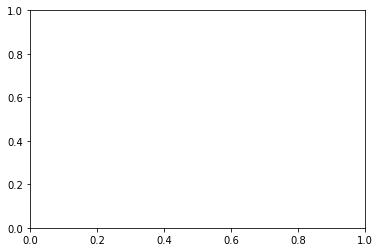

In [61]:
labels = ['Annotator 1', 'Annotator 2', 'Annotator 3']
#x = np.arange(len(labels))  # the label locations
#width = 0.35  # the width of the bars
col_count = 3
bar_width = 0.2
index = np.arange(col_count)
A1_counts = [266, 73, 146, 15]
A2_counts = [294, 74, 65, 67]
A3_counts = [191, 156, 140, 13]
#pdf = pd.DataFrame([['Annotator_1','0',266],['Annotator_1','1',73],['Annotator_1','2',146],['Annotator_1','3',15],
                   #['Annotator_2','0',294],['Annotator_2','1',74], ['Annotator_2','2',65], ['Annotator_2','3',67], ['Annotator_3','0',191],  ['Annotator_3','1',156], ['Annotator_3','2',140], ['Annotator_3','3',13]], columns=['Annotators','ratings','val'])
#pdf.pivot('Annotators', 'ratings', "val").plot(kind='bar')
A = plt.bar(index,
           A1_counts, 
           bar_width,
           alpha=.4,
           label="Annotator_1") 
B = plt.bar(index+0.2,
            A2_counts,
            bar_width,
            alpha=.4,
            label="Annotator_2") 
C = plt.bar(index+0.4,
            A3_counts,
            bar_width,
            alpha=.4,
            label="Annotator_3") # x,y ,width

def createLabels(data):
    for item in data:
        height = item.get_height()
        plt.text(
            item.get_x()+item.get_width()/2., 
            height*1.05, 
            '%d' % int(height),
            ha = "center",
            va = "bottom",
        )
createLabels(A)
createLabels(B)
createLabels(C)
#createLabels(D)
plt.xlabel("Ratings")
plt.ylabel("Counts")
plt.xticks(index+.3 / 2 ,('Annotator 1', 'Annotator 2', 'Annotator 3'))
#plt.xticks(rotation=360, horizontalalignment="center")
plt.legend() #要使用label要加這行
plt.title("The Distribution of Ratings")
#plt.grid(True)
plt.show()

#plt.savefig('dis_anno.png')

## Check df

In [10]:
#還要加轉換後的dh_score進去當target variable
df.columns

Index(['ID', 'Images', 'OCR', 'Template_Name', 'dh_1', 'dh_2', 'dh_3',
       'cln_content', 'ocr_emb', 'tm_emb', 'p2v2_emb', 'ocr_tm_p2v2_500_emb',
       'porn_score', 'profanity_score', 'pronoun_count', 'polarity_score',
       'sentiment', 'rating_avg', 'min_max'],
      dtype='object')

In [130]:
pickle.dump(df, open('df_p2v2.pkl', 'wb'))

In [9]:
df = pickle.load(open('df_p2v2.pkl', 'rb')) 

In [5]:
#df.iloc[:,16]
Annox=df.iloc[:,12:16].values

In [6]:
print(Annox)
Annox.shape
np.save('Annox', Annox)

[[0 0 1 0]
 [0 0 1 0]
 [0 0 0 0]
 ...
 [0 0 1 1]
 [0 0 0 0]
 [0 0 1 2]]


## Combine np.array

In [8]:
#ocr_tm_p2v_500是1536d, Annox是4d
#ocr_tm_p2v_500是2048d, Annox是4d
#ocr_tm_p2v_500是3072d, Annox是4d
#Combined_np1=np.concatenate((ocr_tm_p2v_500, Annox), axis=1)
#Combined_np2=np.concatenate((ocr_tm_p2v2_500, Annox), axis=1)
#Combined_np3=np.concatenate((ocr_tm_p2v3_500, Annox), axis=1)
ocr_annox=np.concatenate((ocr_500, Annox), axis=1)
tm_annox=np.concatenate((tm_500, Annox), axis=1)
p2v_annox=np.concatenate((p2v_500, Annox), axis=1)
tm_p2v_annox=np.concatenate((tm_p2v_500, Annox), axis=1)
ocr_p2v_annox=np.concatenate((ocr_p2v_500, Annox), axis=1)
ocr_tm_annox=np.concatenate((ocr_tm_500, Annox), axis=1)
ocr_tm_p2v_annox=np.concatenate((ocr_tm_p2v_500, Annox), axis=1)

In [11]:
p2v2_annox=np.concatenate((p2v2_500, Annox), axis=1)
tm_p2v2_annox=np.concatenate((tm_p2v2_500, Annox), axis=1)
ocr_p2v2_annox=np.concatenate((ocr_p2v2_500, Annox), axis=1)
p2v3_annox=np.concatenate((p2v3_500, Annox), axis=1)
tm_p2v3_annox=np.concatenate((tm_p2v3_500, Annox), axis=1)
ocr_p2v3_annox=np.concatenate((ocr_p2v3_500, Annox), axis=1)

In [9]:
# Check dimension
#Combined_np1.shape
#Combined_np2.shape
#Combined_np3.shape
ocr_annox.shape
#Combined_np1[0]

(500, 516)

In [34]:
np.save('Combined_np1', Combined_np1)
np.save('Combined_np2', Combined_np2)
np.save('Combined_np3', Combined_np3)

In [10]:
np.save('ocr_annox', ocr_annox)
np.save('tm_annox', tm_annox)
np.save('p2v_annox', p2v_annox)
np.save('tm_p2v_annox', tm_p2v_annox)
np.save('ocr_p2v_annox', ocr_p2v_annox)
np.save('ocr_tm_annox', ocr_tm_annox)
#np.save('ocr_tm_p2v_annox', ocr_tm_p2v_annox)

In [12]:
np.save('p2v2_annox', p2v2_annox)
np.save('p2v3_annox', p2v3_annox)
np.save('tm_p2v2_annox', tm_p2v2_annox)
np.save('tm_p2v3_annox', tm_p2v3_annox)
np.save('ocr_p2v2_annox', ocr_p2v2_annox)
np.save('ocr_p2v3_annox', ocr_p2v3_annox)